In [5]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../data/result.csv')
data['tags'] = data['tags'].apply(ast.literal_eval)
mlb = MultiLabelBinarizer()
tags_binarized = mlb.fit_transform(data['tags'])
tags_df = pd.DataFrame(tags_binarized, columns=mlb.classes_)
data = pd.concat([data, tags_df], axis=1)
data.drop(columns='tags', inplace=True)

In [10]:
tag_cnt = [(tag, data[tag].sum()) for tag in tags_df]
tag_cnt = sorted(tag_cnt, key=lambda x : -x[1])

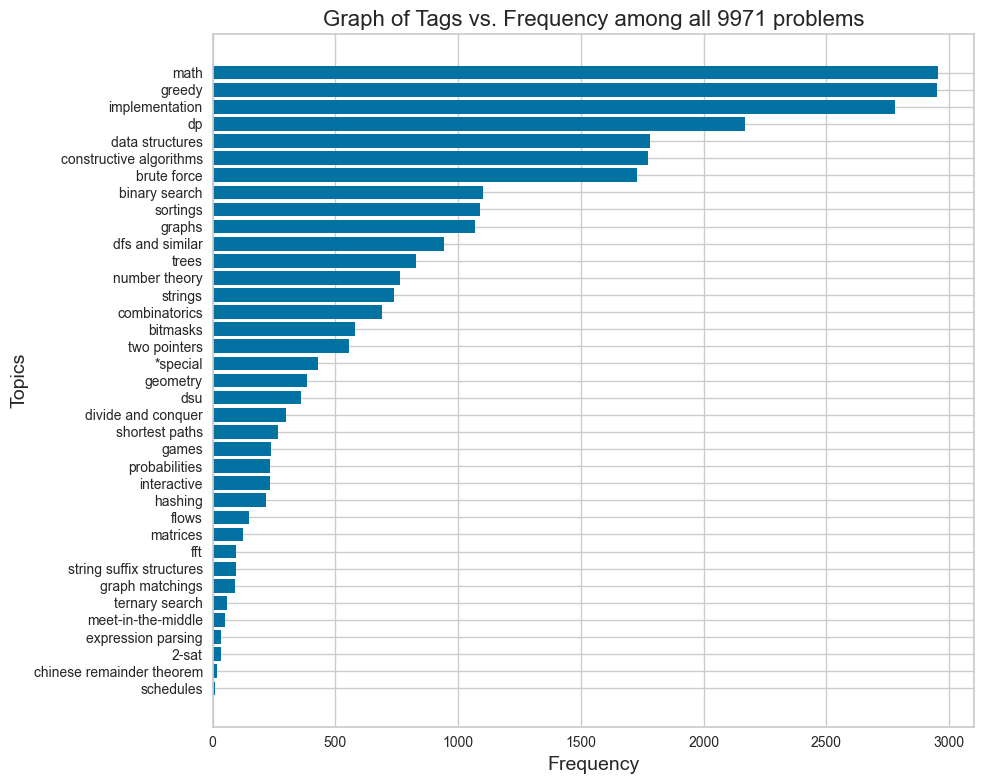

In [14]:
labels, values = zip(*tag_cnt)

plt.figure(figsize=(10, 8))
plt.barh(labels, values)
plt.title(f'Graph of Tags vs. Frequency among all {data.shape[0]} problems', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Topics', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
data = pd.read_csv('../data/result.csv')
data = data.dropna(subset=['Statement'])
data['Statement_Len'] = data['Statement'].apply(len)

In [30]:
data['Statement_Len'].describe()

count    9968.000000
mean      965.677368
std       500.364984
min         1.000000
25%       623.750000
50%       886.000000
75%      1221.000000
max      9873.000000
Name: Statement_Len, dtype: float64